In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Reference the file where the CSV is located
suicidal_thoughts_path = "../API/suicidal_thoughts.csv"


# Import the data into a Pandas DataFrame
suicidal_thoughts = pd.read_csv(suicidal_thoughts_path)
suicidal_thoughts.head(2)

,REF_DATE,GEO,DGUID,Aboriginal identity,Age group,Sex,Perceived mental health and suicidal thoughts,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2012,Canada,2016A000011124,"Total , Aboriginal identity","Total, 18 years and over",Both sexes,"Total, perceived mental health",Number of Persons,Persons,249,units,0,v95715898,1.1.1.1.1.1,684880.0,NaN,NaN,NaN,0
1,2012,Canada,2016A000011124,"Total , Aboriginal identity","Total, 18 years and over",Both sexes,"Total, perceived mental health",Percent,Percent,239,units,0,v95715899,1.1.1.1.1.2,100.0,NaN,NaN,NaN,1


In [6]:
suicidal_indicators = suicidal_thoughts[["Age group", "GEO", "Aboriginal identity",  
                                     'Sex', 'Perceived mental health and suicidal thoughts', 'Statistics',
                                    "VALUE"]]

new_suicidal_indicators = suicidal_indicators.loc[suicidal_indicators["Statistics"] == 'Percent'] 
new_suicidal_indicators_both_sexes=new_suicidal_indicators.loc[suicidal_indicators["Sex"] == 'Both sexes'] 
new_suicidal_indicators_both_sexes_age=new_suicidal_indicators_both_sexes.loc[suicidal_indicators["Age group"] == 'Total, 18 years and over'] 
new_suicidal_indicators_both_sexes_age_indicators=new_suicidal_indicators_both_sexes_age.loc[(suicidal_indicators["Perceived mental health and suicidal thoughts"] == 'Excellent or very good perceived mental health') | 
                                    (suicidal_indicators["Perceived mental health and suicidal thoughts"] =="Ever seriously considered committing suicide") |
                                    (suicidal_indicators["Perceived mental health and suicidal thoughts"] =="Seriously considered committing suicide in the past 12 months")]
new_suicidal_indicators_both_sexes_age_indicators


,Age group,GEO,Aboriginal identity,Sex,Perceived mental health and suicidal thoughts,Statistics,VALUE
5,"Total, 18 years and over",Canada,"Total , Aboriginal identity",Both sexes,Excellent or very good perceived mental health,Percent,58.4
25,"Total, 18 years and over",Canada,"Total , Aboriginal identity",Both sexes,Ever seriously considered committing suicide,Percent,18.5
29,"Total, 18 years and over",Canada,"Total , Aboriginal identity",Both sexes,Seriously considered committing suicide in the...,Percent,4.5
581,"Total, 18 years and over",Canada,First Nations (North American Indian),Both sexes,Excellent or very good perceived mental health,Percent,56.6
601,"Total, 18 years and over",Canada,First Nations (North American Indian),Both sexes,Ever seriously considered committing suicide,Percent,19.9
605,"Total, 18 years and over",Canada,First Nations (North American Indian),Both sexes,Seriously considered committing suicide in the...,Percent,5.2
1157,"Total, 18 years and over",Canada,"First Nations (North American Indian), Registe...",Both sexes,Excellent or very good perceived mental health,Percent,55.5
1177,"Total, 18 years and over",Canada,"First Nations (North American Indian), Registe...",Both sexes,Ever seriously considered committing suicide,Percent,20.5
1181,"Total, 18 years and over",Canada,"First Nations (North American Indian), Registe...",Both sexes,Seriously considered committing suicide in the...,Percent,5.0
1733,"Total, 18 years and over",Canada,"First Nations (North American Indian), not a R...",Both sexes,Excellent or very good perceived mental health,Percent,58.6


In [7]:
clean_suicidal_indicators=new_suicidal_indicators_both_sexes_age_indicators[["GEO", "Aboriginal identity",  
                                     'Perceived mental health and suicidal thoughts', "VALUE"]]

clean_suicidal_indicators.head()

,GEO,Aboriginal identity,Perceived mental health and suicidal thoughts,VALUE
5,Canada,"Total , Aboriginal identity",Excellent or very good perceived mental health,58.4
25,Canada,"Total , Aboriginal identity",Ever seriously considered committing suicide,18.5
29,Canada,"Total , Aboriginal identity",Seriously considered committing suicide in the...,4.5
581,Canada,First Nations (North American Indian),Excellent or very good perceived mental health,56.6
601,Canada,First Nations (North American Indian),Ever seriously considered committing suicide,19.9


In [8]:
pivoted_clean_suicidal_indicators = clean_suicidal_indicators.pivot_table(index=["GEO","Perceived mental health and suicidal thoughts"], 
                                          columns="Aboriginal identity", values="VALUE").reset_index()
pivoted_clean_suicidal_indicators.head()

Aboriginal identity,GEO,Perceived mental health and suicidal thoughts,First Nations (North American Indian),"First Nations (North American Indian), Registered or Treaty Indian","First Nations (North American Indian), not a Registered or Treaty Indian",Inuk (Inuit),Métis,"Total , Aboriginal identity"
0,Alberta,Ever seriously considered committing suicide,24.0,22.3,28.9,NaN,18.1,20.4
1,Alberta,Excellent or very good perceived mental health,55.0,54.8,55.6,56.7,62.5,59.5
2,Alberta,Seriously considered committing suicide in the...,5.5,4.7,NaN,NaN,4.3,4.6
3,Atlantic,Ever seriously considered committing suicide,11.6,13.9,9.3,12.7,10.8,11.5
4,Atlantic,Excellent or very good perceived mental health,61.8,60.0,63.6,67.6,67.4,63.9


In [10]:
Canada_df=pivoted_clean_suicidal_indicators.loc[pivoted_clean_suicidal_indicators["GEO"]=="Canada"]
Canada_df_final=Canada_df.loc[:, ['Perceived mental health and suicidal thoughts',
       'First Nations (North American Indian)',
       'First Nations (North American Indian), Registered or Treaty Indian',
       'First Nations (North American Indian), not a Registered or Treaty Indian',
       'Inuk (Inuit)', 'Métis']]
Canada_df_final

Aboriginal identity,Perceived mental health and suicidal thoughts,First Nations (North American Indian),"First Nations (North American Indian), Registered or Treaty Indian","First Nations (North American Indian), not a Registered or Treaty Indian",Inuk (Inuit),Métis
9,Ever seriously considered committing suicide,19.9,20.5,19.1,20.8,16.7
10,Excellent or very good perceived mental health,56.6,55.5,58.6,49.6,61.4
11,Seriously considered committing suicide in the...,5.2,5.0,5.7,5.5,3.8


No handles with labels found to put in legend.


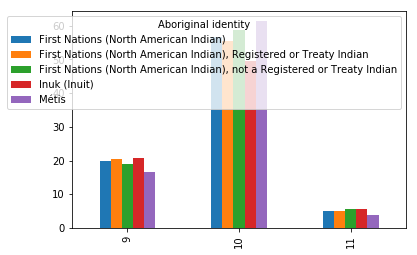

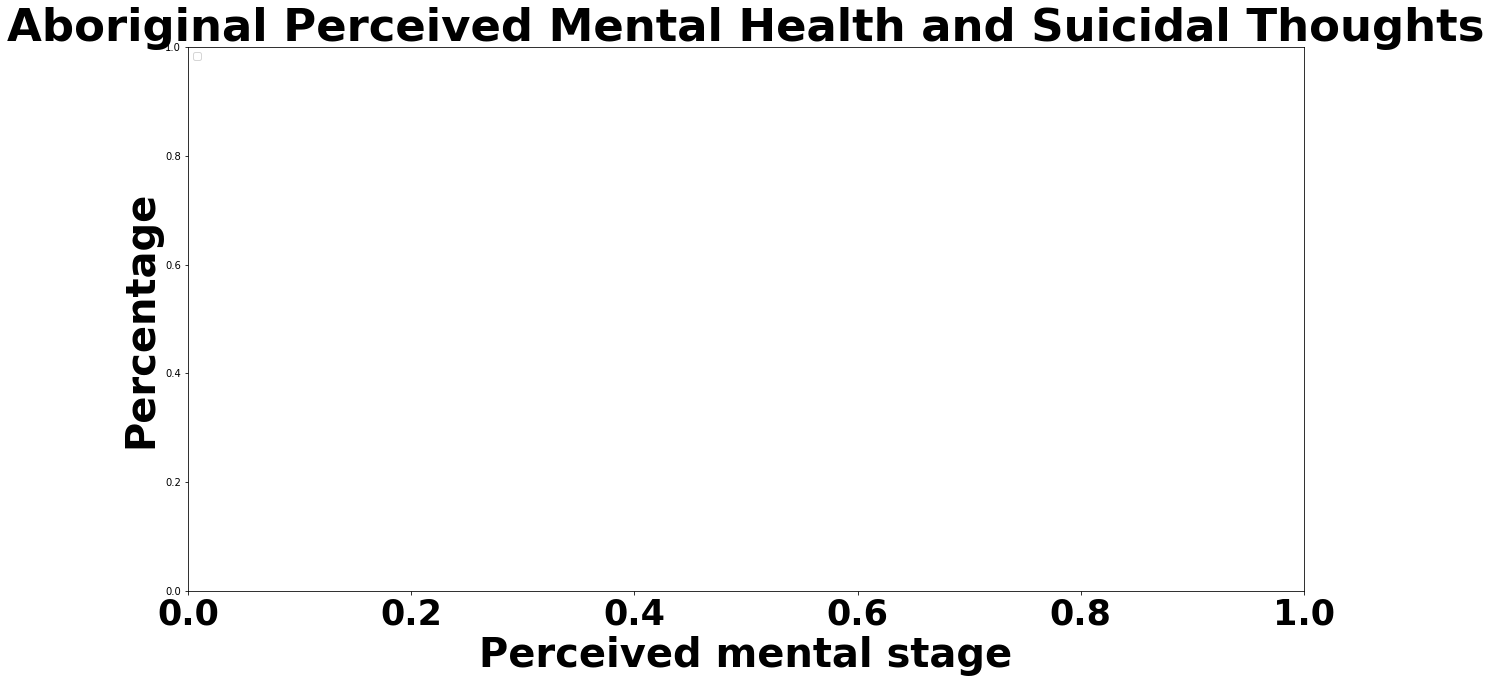

In [23]:
#pandas plot worked!
Canada_df_final.plot(kind="bar")

plt.figure(figsize=(20, 10))
plt.tick_params(labelsize=10)
plt.xticks(rotation=0, fontsize=35,fontweight='bold')
plt.xlabel('Perceived mental stage', fontsize=40,fontweight='bold')
plt.ylabel('Percentage', fontsize=40,fontweight='bold')
plt.title('Aboriginal Perceived Mental Health and Suicidal Thoughts',fontsize=45,fontweight='bold')
plt.legend(loc=2, prop={'size': 10} )

<BarContainer object of 3 artists>

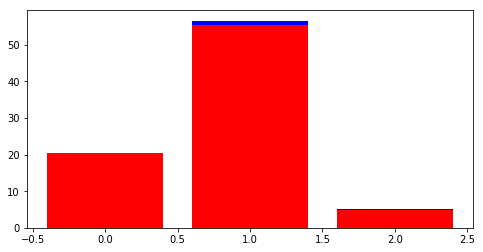

In [41]:
## Trying to do with subplots, no success!!

fig, ax = plt.subplots(figsize=(8,4))
x_axis = np.arange(len(Canada_df_final["Perceived mental health and suicidal thoughts"]))
ax.bar(x_axis, Canada_df_final["First Nations (North American Indian)"], color="b", align="center")
ax.bar(x_axis, Canada_df_final["First Nations (North American Indian), Registered or Treaty Indian"], color="r", align="center")